In [15]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
%matplotlib inline

In [16]:
which_training = '/home/margaryta/my_training/MICCAI-WMH-2017/work_dirs/psp_r50_dice_40k_MICCAI_WMH/'

In [17]:
data = []
for line in open(which_training+'None.log.json', 'r'):
    data.append(json.loads(line))

In [18]:
data[1].keys()

dict_keys(['mode', 'epoch', 'iter', 'lr', 'memory', 'data_time', 'decode.loss_dice', 'decode.acc_seg', 'aux.loss_dice', 'aux.acc_seg', 'loss', 'time'])

In [19]:
feature = 'loss' #'aux.acc_seg'

In [20]:
data_dict = {}
for elem in data:
    if 'iter' in elem.keys() and feature in elem.keys():
        data_dict[elem['iter']] = elem[feature]

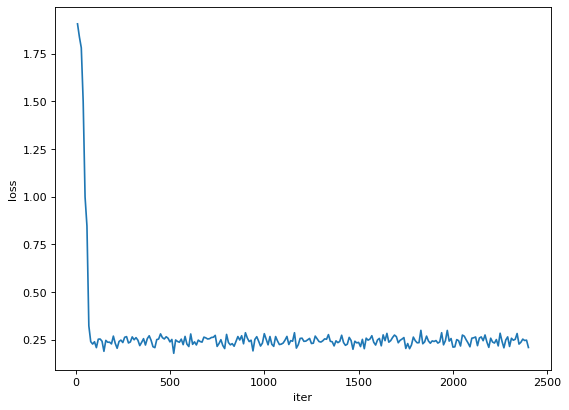

In [21]:
x = list(data_dict.keys())
y = list(data_dict.values())

plt.figure(figsize=(8, 6), dpi=80)
plt.plot(list(data_dict.keys()), list(data_dict.values()))
plt.xlabel('iter')
plt.ylabel(feature)

#define x as 200 equally spaced values between the min and max of original x 
xnew = np.linspace(np.min(x), np.max(x), 20) 

#define spline
spl = make_interp_spline(x, y, k=3)
y_smooth = spl(xnew)

#plt.plot(xnew, y_smooth, c='red')


In [ ]:
from mmseg.apis import inference_segmentor, init_segmentor, show_result_pyplot
import mmcv

In [ ]:
config_file = which_training+'test_config.py'
checkpoint_file = which_training+'iter_40000.pth'

In [59]:
# build the model from a config file and a checkpoint file
model = init_segmentor(config_file, checkpoint_file, device='cuda:0')

load checkpoint from local path: /home/margaryta/my_training/MICCAI-WMH-2017/work_dirs/psp_r50_dice_40k_MICCAI_WMH/iter_40000.pth


FileNotFoundError: /home/margaryta/my_training/MICCAI-WMH-2017/work_dirs/psp_r50_dice_40k_MICCAI_WMH/iter_40000.pth can not be found.

In [ ]:
with open('/media/data_4T/bran/WMH_dataset/pre_processed/splits/val.txt') as file_in:
    elem = []
    for line in file_in:
        elem.append(line.strip())

In [ ]:
len(elem)

1112

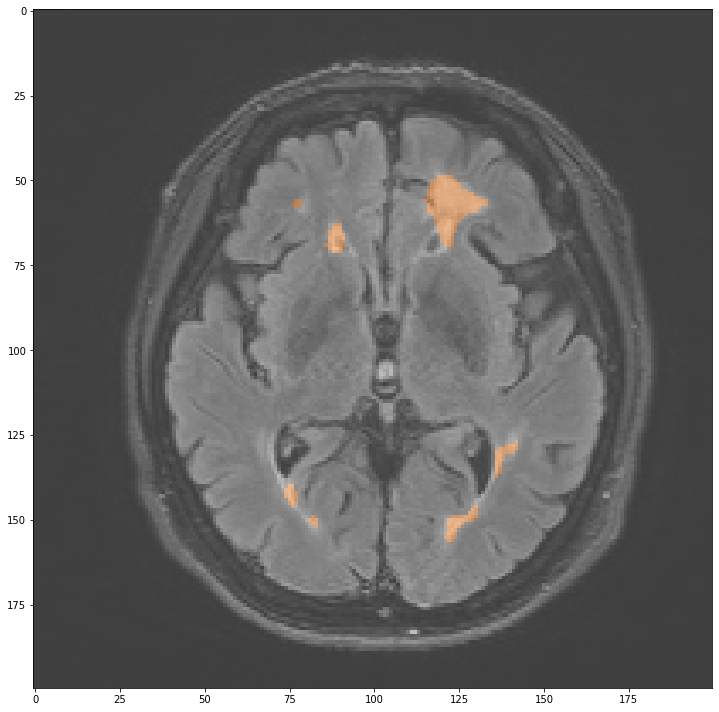

In [ ]:
# test a single image
img = '/media/data_4T/bran/WMH_dataset/pre_processed/images/'+elem[1007]+'.png'
result = inference_segmentor(model, img)
# show the results
show_result_pyplot(model, img, result)